Loading built-in Titanic dataset from Seaborn...
Data loaded successfully.
Loaded and cleaned 891 passenger records.

--- STEP 1: Initial Data Inspection ---

[1. Data Head (First 5 Rows)]
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  woman       False  Southampton   yes   True  
3  woman       False  Southampton   yes  False  
4    man        True  Southampton    no   True  

[2. Data Info (Data Types & Nulls)]
<class 'pandas.core.fra

/tmp/ipython-input-1407134383.py:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pclass', palette='viridis')



--- STEP 3: Bivariate Analysis Plots ---


/tmp/ipython-input-1407134383.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='pclass', y='age', palette='pastel')



--- STEP 4: Multivariate Analysis Plots ---
Generating Pair Plot... this may take a moment.

--- All plots generated. Displaying... ---


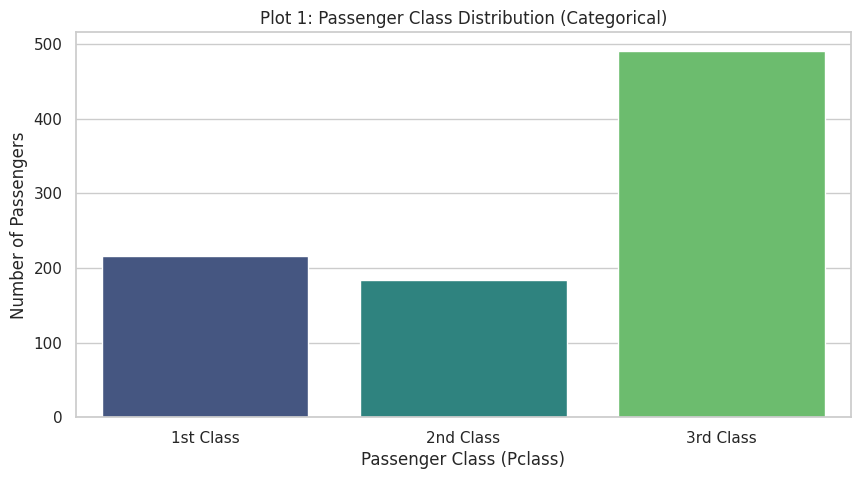

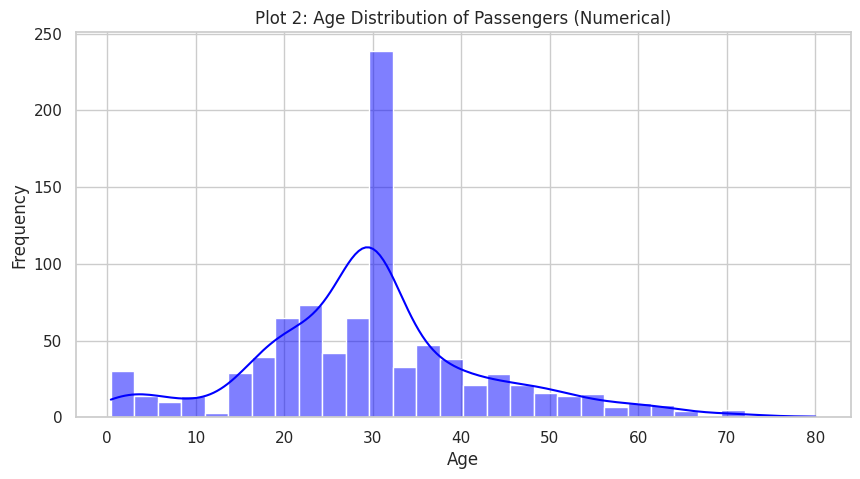

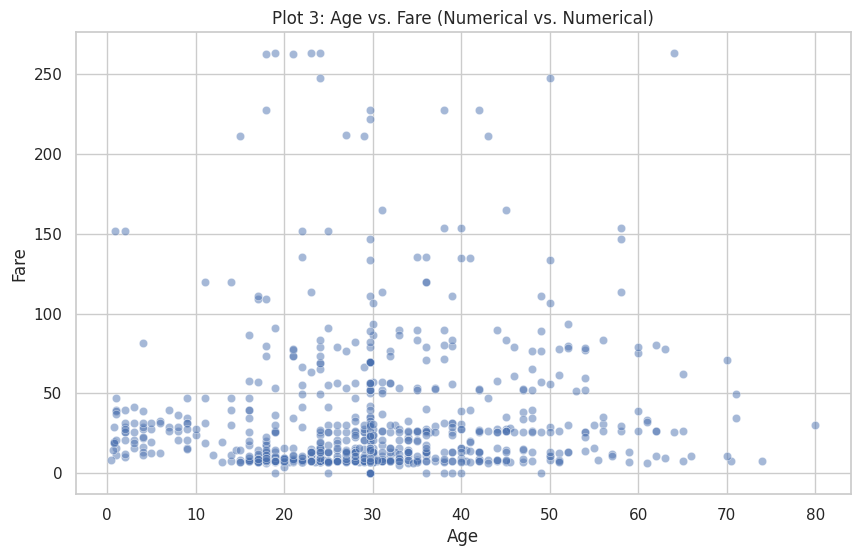

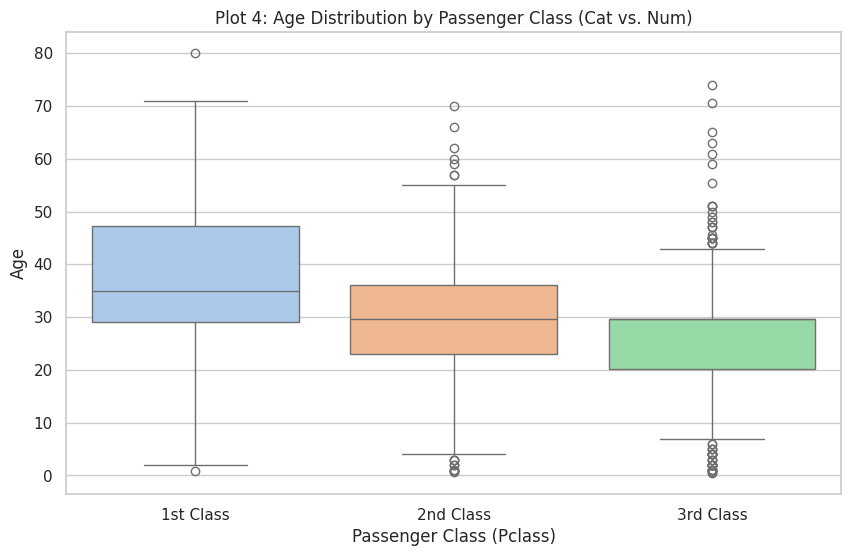

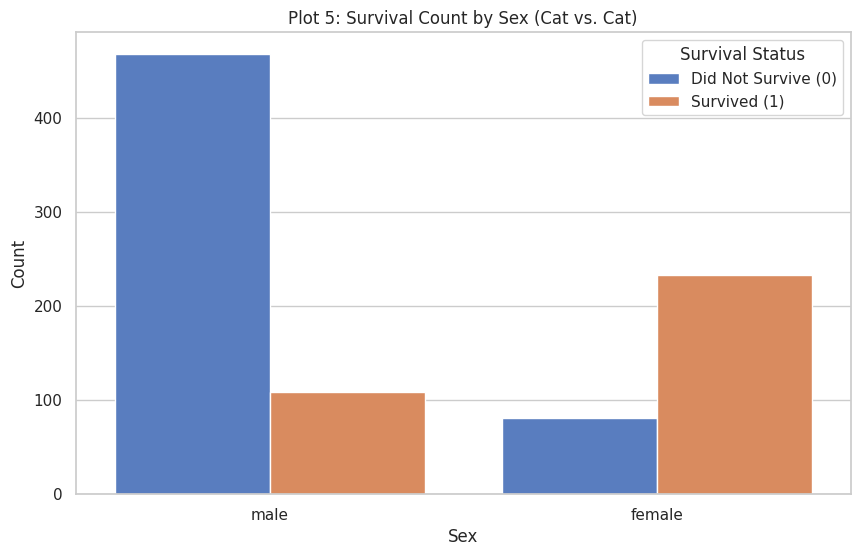

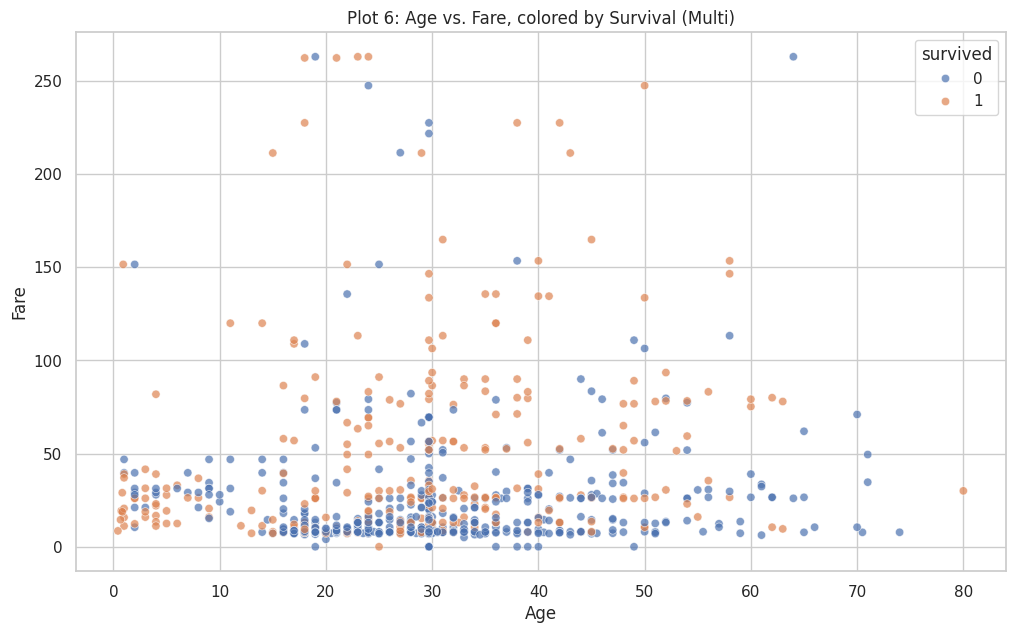

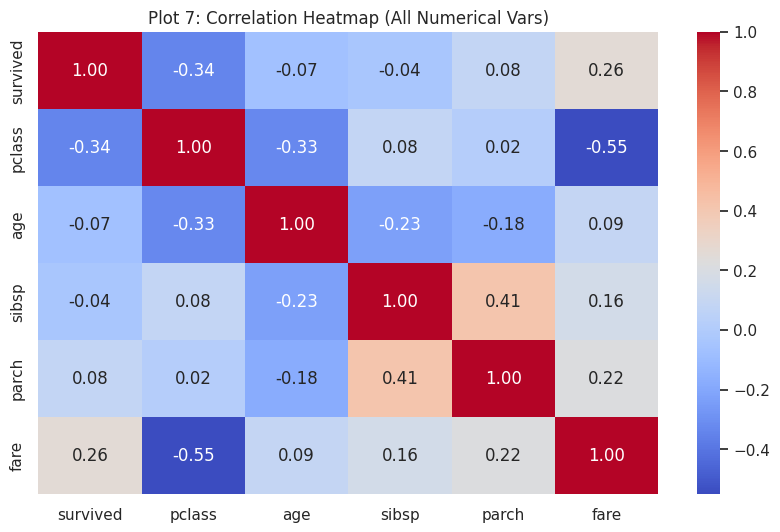

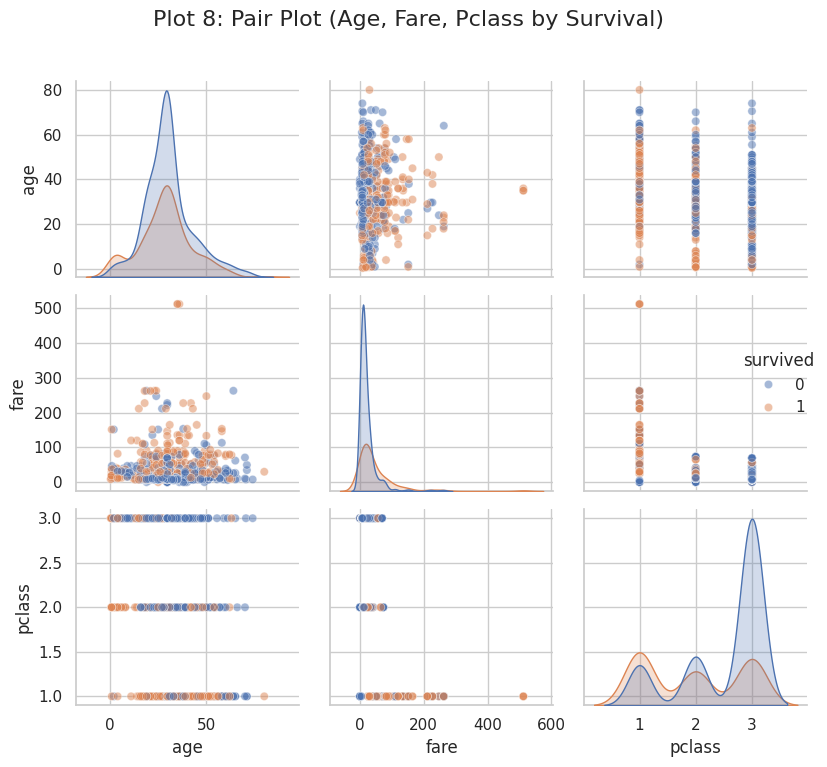

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. WHAT IS EXPLORATORY DATA ANALYSIS (EDA)? ---
#
# EDA is the process of "getting to know" your data. Before you build a
# machine learning model or draw any final conclusions, you must understand
# what your data contains.
#
# The main goals are to:
# 1.  Inspect the data: Check for nulls, see data types, get a first look.
# 2.  Summarize: Calculate basic statistics (mean, median, count).
# 3.  Visualize: Use charts to find patterns, relationships, and outliers.
#
# This script is structured to follow a standard EDA workflow.
# We will use the 'titanic' dataset, which is perfect for EDA because
# it has a good mix of data types:
#
# -   Numerical (Continuous): 'age', 'fare'
# -   Numerical (Discrete): 'sibsp' (siblings/spouses), 'parch' (parents/children)
# -   Categorical: 'sex', 'embarked' (port), 'pclass' (passenger class)
# -   Target Variable: 'survived' (0 = No, 1 = Yes)
#
# --- 2. LOAD AND PREPARE DATA ---

def load_and_prepare_data():
    """
    Loads the built-in Titanic dataset and performs basic cleaning.
    """
    try:
        print("Loading built-in Titanic dataset from Seaborn...")
        df = sns.load_dataset('titanic')
        print("Data loaded successfully.")

        # --- Data Cleaning ---
        # Fill missing 'age' values with the mean age
        mean_age = df['age'].mean()
        df['age'] = df['age'].fillna(mean_age)

        # Fill missing 'embarked' values with the most common port
        mode_embarked = df['embarked'].mode()[0]
        df['embarked'] = df['embarked'].fillna(mode_embarked)

        # 'deck' has too many missing values, so we'll drop it
        df = df.drop(columns=['deck'])

        print(f"Loaded and cleaned {len(df)} passenger records.")
        return df

    except Exception as e:
        print(f"An error occurred while loading the dataset: {e}")
        return None

# --- 3. STEP 1: INITIAL DATA INSPECTION ---
#
# First, just look at the data. What are the columns? What are the data types?
# Are there any missing (null) values?

def step_1_initial_inspection(df):
    """
    Prints the basic information about the DataFrame.
    """
    print("\n--- STEP 1: Initial Data Inspection ---")

    # 1. .head(): Look at the first 5 rows
    print("\n[1. Data Head (First 5 Rows)]")
    print(df.head())

    # 2. .info(): Check data types and non-null counts
    print("\n[2. Data Info (Data Types & Nulls)]")
    # This is CRITICAL. It tells you 'age' is float, 'sex' is object (string), etc.
    df.info()

    # 3. .describe(): Get statistical summary for NUMERICAL columns
    print("\n[3. Data Description (Numerical Summary)]")
    # Shows mean, median (50%), min, max, std dev for numerical columns
    print(df.describe())

    # 4. .describe(include='object'): Get summary for CATEGORICAL columns
    print("\n[4. Data Description (Categorical Summary)]")
    # Shows count, unique values, top value, and frequency of top value
    print(df.describe(include='object'))

# --- 4. STEP 2: UNIVARIATE ANALYSIS (Analyzing ONE variable) ---
#
# We analyze variables one by one to understand their individual distributions.
#
# -   For CATEGORICAL data: We use a Count Plot.
# -   For NUMERICAL data: We use a Histogram or KDE Plot.

def step_2_univariate_analysis(df):
    """
    Generates plots for analyzing single variables.
    """
    print("\n--- STEP 2: Univariate Analysis Plots ---")

    # PLOT 1: Count Plot (for Categorical Variable)
    # ----------------------------------------------
    # - WHAT: Shows the count of observations in each category.
    # - WHY: To see the distribution of categories (e.g., more males than females).
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x='pclass', palette='viridis')
    plt.title('Plot 1: Passenger Class Distribution (Categorical)')
    plt.xlabel('Passenger Class (Pclass)')
    plt.ylabel('Number of Passengers')
    plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])

    # PLOT 2: Histogram / KDE Plot (for Numerical Variable)
    # ----------------------------------------------------
    # - WHAT: Shows the distribution (spread, skew, center) of a numerical variable.
    # - WHY: To find the shape of the data (e.g., 'age' is roughly normal, 'fare' is skewed).
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x='age', bins=30, kde=True, color='blue')
    plt.title('Plot 2: Age Distribution of Passengers (Numerical)')
    plt.xlabel('Age')
    plt.ylabel('Frequency')

# --- 5. STEP 3: BIVARIATE ANALYSIS (Analyzing TWO variables) ---
#
# Now we look for relationships BETWEEN two variables. The plot type
# depends on the data types of the two variables.

def step_3_bivariate_analysis(df):
    """
    Generates plots for analyzing relationships between two variables.
    """
    print("\n--- STEP 3: Bivariate Analysis Plots ---")

    # PLOT 3: Numerical vs. Numerical -> Scatter Plot
    # ------------------------------------------------
    # - WHAT: Shows the relationship between two numerical variables.
    # - WHY: To look for correlation (e.g., does 'age' affect 'fare'?).
    plt.figure(figsize=(10, 6))
    # We filter 'fare' < 300 to remove extreme outliers for a clearer plot
    sns.scatterplot(data=df[df['fare'] < 300], x='age', y='fare', alpha=0.5)
    plt.title('Plot 3: Age vs. Fare (Numerical vs. Numerical)')
    plt.xlabel('Age')
    plt.ylabel('Fare')

    # PLOT 4: Categorical vs. Numerical -> Box Plot or Violin Plot
    # -------------------------------------------------------------
    # - WHAT: Compares the distribution of a numerical variable across categories.
    # - WHY: To see if the numerical value changes based on the category (e.g., is 'age'
    #        different for '1st Class' vs '3rd Class'?).
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='pclass', y='age', palette='pastel')
    # A Violin Plot is a Box Plot + KDE, showing more detail:
    # sns.violinplot(data=df, x='pclass', y='age', palette='pastel')
    plt.title('Plot 4: Age Distribution by Passenger Class (Cat vs. Num)')
    plt.xlabel('Passenger Class (Pclass)')
    plt.ylabel('Age')
    plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])

    # PLOT 5: Categorical vs. Categorical -> Grouped Count Plot (or Heatmap)
    # --------------------------------------------------------------------
    # - WHAT: Shows the count of one category, broken down by a second category.
    # - WHY: To see the interaction between two categories (e.g., survival by sex).
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x='sex', hue='survived', palette='muted')
    plt.title('Plot 5: Survival Count by Sex (Cat vs. Cat)')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    # Manually adjust legend labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['Did Not Survive (0)', 'Survived (1)'], title='Survival Status')

# --- 6. STEP 4: MULTIVARIATE ANALYSIS (Analyzing 3+ variables) ---
#
# Looking for more complex interactions.

def step_4_multivariate_analysis(df):
    """
    Generates plots for analyzing three or more variables.
    """
    print("\n--- STEP 4: Multivariate Analysis Plots ---")

    # PLOT 6: Adding 'hue' to a Bivariate Plot
    # -----------------------------------------
    # - WHAT: A scatter plot (2 variables) with points colored by a 3rd categorical variable.
    # - WHY: To see if a 3rd factor influences the relationship (e.g., 'age' vs. 'fare',
    #        but colored by 'survived').
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=df[df['fare'] < 300], x='age', y='fare', hue='survived', alpha=0.7)
    plt.title('Plot 6: Age vs. Fare, colored by Survival (Multi)')
    plt.xlabel('Age')
    plt.ylabel('Fare')

    # PLOT 7: Correlation Heatmap (for all Numerical variables)
    # ---------------------------------------------------------
    # - WHAT: A grid showing the correlation coefficient (from -1 to 1) for every
    #         pair of numerical variables.
    # - WHY: To get a quick overview of ALL numerical relationships at once.
    plt.figure(figsize=(10, 6))
    # .corr() calculates the correlation matrix
    # We must select only numeric types for .corr()
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Plot 7: Correlation Heatmap (All Numerical Vars)')

    # PLOT 8: Pair Plot (The "Shotgun" Approach)
    # -------------------------------------------
    # - WHAT: Creates a grid of scatter plots for every pair of variables.
    # - WHY: A powerful (but slow) way to see all relationships in one go.
    # - NOTE: This can be very slow on large datasets. We'll only use a few columns.
    print("Generating Pair Plot... this may take a moment.")
    # We add 'hue' to make it even more insightful
    sns.pairplot(df, vars=['age', 'fare', 'pclass'], hue='survived',
                 plot_kws={'alpha': 0.5})
    # This plot will show in a separate window due to how pairplot is built
    plt.suptitle('Plot 8: Pair Plot (Age, Fare, Pclass by Survival)', y=1.02, fontsize=16)

def main():
    """
    Main function to run the complete EDA tutorial.
    """
    sns.set_theme(style="whitegrid")

    df = load_and_prepare_data()

    if df is not None:
        # Run text-based analysis
        step_1_initial_inspection(df)

        # Generate all plots
        step_2_univariate_analysis(df)
        step_3_bivariate_analysis(df)
        step_4_multivariate_analysis(df)

        # --- Show all plots ---
        print("\n--- All plots generated. Displaying... ---")
        plt.tight_layout() # Adjusts plots to prevent overlap
        plt.show()
    else:
        print("Could not analyze data due to loading error.")

if __name__ == "__main__":
    main()